# **Lab 5: Multi-Class Classification**


## Exercise 2: More Decision Tree

In this exercice you will build a multiclass classification model using Decision Tree.

For that we will use the famous Zoo dataset which we can find on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Zoo

You will have to import the prepared dataset from the following link:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex3/zoo.csv

The steps are:

1.   Import and explore the dataset
2.   Prepare data
3.   Split data
4.   Assess baseline model
5.   Train a Decision Tree with Default Hyperparameters
6.   Reduce Decision Tree Overfitting
7.   Assess model on Testing Set



---
### 0. Setup Environment

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

lab = LabExFolder(
  course_code="36106",
  lab="lab05",
  exercise="ex02"
)
lab.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/36106/labs/lab05/ex02/data


In [2]:
import warnings
warnings.simplefilter(action='ignore')

## 1. Load and Explore Dataset

**[1.2]** Import the pandas and numpy packages

In [3]:
# Placeholder for student's code

In [4]:
# Solution
import pandas as pd
import numpy as np

**[1.3]** Load the dataset into a dataframe called `df`

In [5]:
# Placeholder for student's code

In [6]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex3/zoo.csv'
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of `df`

In [7]:
# Placeholder for student's code

In [8]:
# Solution
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**[1.5]** Display the dimensions (shape) of `df`

In [9]:
# Placeholder for student's code

In [10]:
# Solution
df.shape

(101, 18)

**[1.6]** Display the summary (info) of `df`

In [11]:
# Placeholder for student's code

In [12]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**[1.7]** Display the descriptive statictics of `df`


In [13]:
# Placeholder for student's code

In [14]:
# Solution
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


**[1.8]** Create a for loop that will iterate through each columns and print their list of unique values

In [15]:
# Placeholder for student's code

In [16]:
# Solution:
for col in df.columns:
  print(col)
  print(df[col].unique())

animal_name
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair
[1 0]
feathers
[0 1]
eggs
[0 1]
milk
[1 0]
airborne
[0 1]
aquatic
[0 1]
predator
[

Most of the columns are binary. The feature 'legs' is numerical. Two of them are categorical: animal_name and type. 'type' is our target variable, we will transform it into categorical. The 'animal_type' feature is correlated to 'type' so we will drop it.

## 2. Data Preparation

**[2.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

In [17]:
# Placeholder for student's code

In [18]:
# Solution
df_cleaned = df.copy()

**[2.2]** Drop the `animal_type` columns

In [19]:
# Placeholder for student's code

In [20]:
# Solution
df_cleaned.drop(['animal_name'], axis=1, inplace=True)

**[2.3]** Convert the `type` column into categorical

In [21]:
# Placeholder for student's code

In [22]:
# Solution
df_cleaned['type'] = df_cleaned['type'].astype('category')
df_cleaned['type']

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


## 3. Splitting Data

Note: If you are stuck in previous steps, you can dowload the content of df_cleaned here: 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex3/df_cleaned.csv'

**[3.1]** Split the data into feature **X** and target **y**:

In [23]:
# Placeholder for student's code

In [24]:
# Solution
y = df_cleaned.pop('type')
X = df_cleaned

**[3.2]** Print the frequencies of each value of the target variable

In [25]:
# Placeholder for student's code

In [26]:
# Solution
y.value_counts(normalize=True)

,proportion
type,
1,0.405941
2,0.198020
4,0.128713
7,0.099010
6,0.079208
3,0.049505
5,0.039604


**[3.3]** Import train_test_split from sklearn.model_selection

In [27]:
# Placeholder for student's code

In [28]:
# Solution
from sklearn.model_selection import train_test_split

**[3.4]** Split randomly the dataset into 2 different sets: data (80%) and test (20%) with random_state=8

In [29]:
# Placeholder for student's code

In [30]:
# Solution
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

**[3.5]** Print the frequencies of each value of the target variable from the testing set

In [31]:
# Placeholder for student's code

In [32]:
# Solution
y_test.value_counts(normalize=True)

,proportion
type,
1,0.380952
2,0.285714
3,0.142857
6,0.095238
4,0.047619
7,0.047619
5,0.000000


We can see that class 5 is missing from this split

**[3.6]** Split randomly the dataset into 2 different sets: data (80%) and test (20%) with random_state=8 and stratify=y and print the frequencies of each value of the target variable from the testing set

In [33]:
# Placeholder for student's code

In [34]:
# Solution
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)
y_test.value_counts(normalize=True)

,proportion
type,
1,0.380952
2,0.190476
4,0.142857
7,0.095238
6,0.095238
3,0.047619
5,0.047619


**[3.7]** Split the data randomly into 2 different sets: training (80%) and validation (20%) with random_state=8 and stratify=y_data and print the frequencies of each value of the target variable from the validation set

In [35]:
# Placeholder for student's code

In [36]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8, stratify=y_data)
y_val.value_counts(normalize=True)

,proportion
type,
1,0.4375
2,0.1875
4,0.1250
3,0.0625
5,0.0625
6,0.0625
7,0.0625


**[3.8]** Print the frequencies of each value of the target variable from the training set

In [37]:
# Placeholder for student's code

In [38]:
# Solution
y_train.value_counts(normalize=True)

,proportion
type,
1,0.406250
2,0.203125
4,0.125000
7,0.109375
6,0.078125
3,0.046875
5,0.031250


## 4. Assess Baseline Model

Note: If you are stuck in previous steps, you can dowload the content of the split sets here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex3


**[4.1]** Import the DummyClassifier module from sklearn

In [39]:
# Placeholder for student's code

In [40]:
# Solution
from sklearn.dummy import DummyClassifier

**[4.2]** Instantiate the Dummy class into a variable called `base_clf` and fit it on the training set it

In [41]:
# Placeholder for student's code

In [42]:
# Solution
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

**[4.3]** Import the accuracy and f1 scores from sklearn

In [43]:
# Placeholder for student's code

In [44]:
# Solution
from sklearn.metrics import accuracy_score, f1_score

**[4.4]** Display the accuracy and f1 scores of this baseline model on the training set

In [45]:
# Placeholder for student's code

In [46]:
# Solution
y_preds = base_clf.predict(X_train)
print(accuracy_score(y_train, y_preds))
print(f1_score(y_train, y_preds, average='weighted'))

0.40625
0.2347222222222222


## 5. Train a Decision Tree with Default Hyperparameters

**[5.1]** Import DecisionTreeClassifier from sklearn.tree

In [47]:
# Placeholder for student's code

In [48]:
# Solution
from sklearn.tree import DecisionTreeClassifier

**[5.2]** Instantiate a DecisionTreeClassifier() model with random_state=42 parameter in order to keep our results consistent

In [49]:
# Placeholder for student's code

In [50]:
# Solution
tree_1 = DecisionTreeClassifier(random_state=42)

**[5.3]** Train the model on the training set and save the predictions from the training and validation sets


In [51]:
# Placeholder for student's code

In [52]:
# Solution
tree_1.fit(X_train, y_train)
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[5.4]** Print the accuracy score of the training and validation sets

In [53]:
# Placeholder for student's code

In [54]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

1.0
0.9375


**[5.5]** Print the f1 score of the training and validation sets

In [55]:
# Placeholder for student's code

In [56]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

1.0
0.9166666666666666


**[5.6]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [57]:
# Placeholder for student's code

In [58]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[5.7]** Print the confusion matrices for the training and validation sets for this model

In [59]:
# Placeholder for student's code

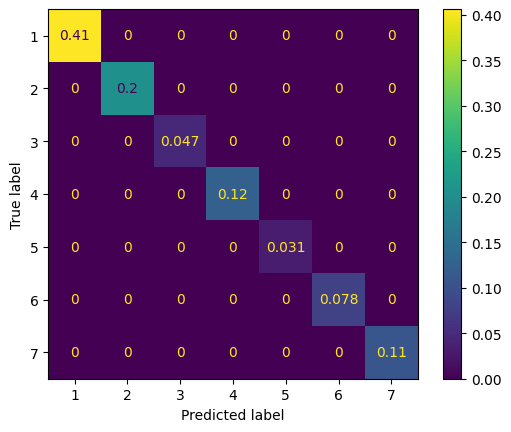

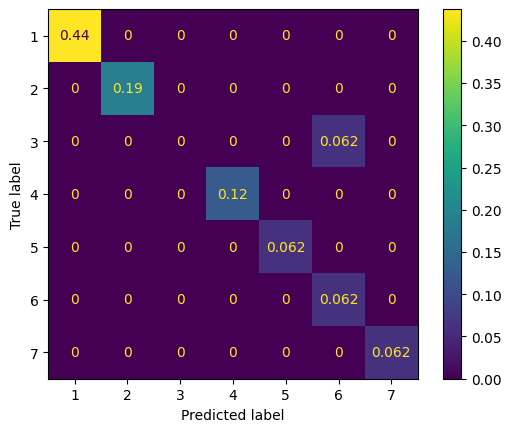

In [60]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_1, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(tree_1, X_val, y_val, normalize='all')

## 6. Reduce Decision Tree Overfitting

### a. Try Different Hyperparamaters Values

**[6.1]** Train a DecisionTree model with min_samples_split=5 and print the accuracy score for the training and validation sets

In [61]:
# Placeholder for student's code

In [62]:
# Solution
tree_3 = DecisionTreeClassifier(random_state=42, min_samples_split=5).fit(X_train, y_train)
y_train_preds = tree_3.predict(X_train)
y_val_preds = tree_3.predict(X_val)

**[6.2]** Print the accuracy score of the training and validation sets

In [63]:
# Placeholder for student's code

In [64]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.984375
0.9375


**[6.3]** Print the f1 score of the training and validation sets

In [65]:
# Placeholder for student's code

In [66]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9844842657342657
0.9166666666666666


### b. Try Different Hyperparamaters Values

**[6.4]** Train a DecisionTree model with min_samples_split=20 and print the accuracy score for the training and validation sets

In [67]:
# Placeholder for student's code

In [68]:
# Solution
tree_4 = DecisionTreeClassifier(random_state=42, min_samples_split=20).fit(X_train, y_train)
y_train_preds = tree_4.predict(X_train)
y_val_preds = tree_4.predict(X_val)

**[6.5]** Print the accuracy score of the training and validation sets

In [69]:
# Placeholder for student's code

In [70]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.84375
0.8125


**[6.6]** Print the f1 score of the training and validation sets

In [71]:
# Placeholder for student's code

In [72]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7981770833333334
0.775


**[6.7]** Print the current value of max_depth

In [73]:
# Placeholder for student's code

In [74]:
# Solution
tree_4.tree_.max_depth

3

### c. Try Different Hyperparamaters Values

**[6.8]** Train a DecisionTree model with min_samples_split=5, max_depth=3 and print the accuracy score for the training and validation sets

In [75]:
# Placeholder for student's code

In [76]:
# Solution
tree_5 = DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=3).fit(X_train, y_train)
y_train_preds = tree_5.predict(X_train)
y_val_preds = tree_5.predict(X_val)

**[6.9]** Print the accuracy score of the training and validation sets

In [77]:
# Placeholder for student's code

In [78]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.84375
0.8125


**[6.10]** Print the f1 score of the training and validation sets

In [79]:
# Placeholder for student's code

In [80]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7981770833333334
0.775


### d. Try Different Hyperparamaters Values

**[6.11]** Train a DecisionTree model with min_samples_split=20, max_depth=4 and print the accuracy score for the training and validation sets

In [81]:
# Placeholder for student's code

In [82]:
# Solution
tree_6 = DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=4).fit(X_train, y_train)
y_train_preds = tree_6.predict(X_train)
y_val_preds = tree_6.predict(X_val)

**[6.12]** Print the accuracy score of the training and validation sets

In [83]:
# Placeholder for student's code

In [84]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.90625
0.875


**[6.13]** Print the f1 score of the training and validation sets

In [85]:
# Placeholder for student's code

In [86]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.8803819444444444
0.84375


## 7. Assess model on Testing Set

**[7.1]** Print the accuracy and f1 scores of our best model on the testing set

In [87]:
# Placeholder for student's code

In [88]:
# Solution:
y_test_preds = tree_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9047619047619048
0.8857142857142856


**[7.2]** Display the confusion matrix for our best model on all sets

In [89]:
# Placeholder for student's code

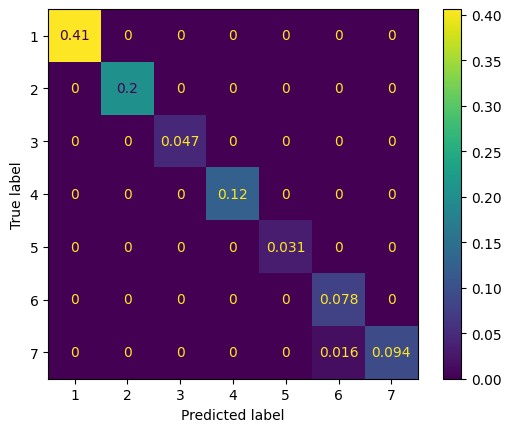

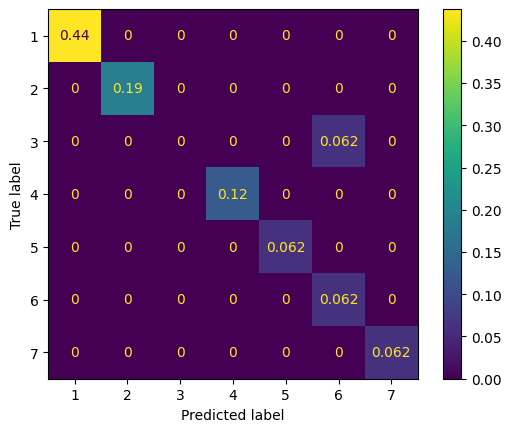

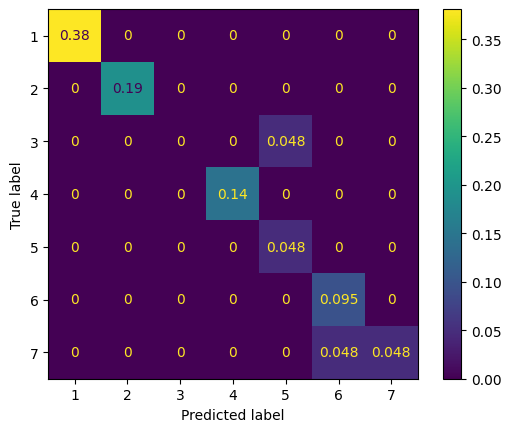

In [90]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_3, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(tree_3, X_val, y_val, normalize='all')
ConfusionMatrixDisplay.from_estimator(tree_3, X_test, y_test, normalize='all')